<h1 align="center" style="color:red"> 
    <b>
        Gradient Descent
    </b>
</h1>

Neste material, será tratado o conteúdo referente ao gradiente descendente, o qual é aplicado em inúmeros algoritmos de Machine Learning. Este é utilizado para minimizar a função de custo. Dessa maneira, a regressão linear é um bom começo para compreender a questão da minimização desta função. A princípio, iremos utilizar a MSE (Mean Squared) como função de referência para cálculo do erro.

<h2 align="center"> 
    <b>
        Example 1: Implementation with y = 2x, that is, one single attribute.
    </b>
</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


from pylab import *
import random

%matplotlib inline

In [2]:
# Reseting random seed to generate always the same random values
np.random.seed(1234)

In [3]:
# Number of examples
N = 1000

In [4]:
# Input values (features)
x1 = 10.0 * np.random.rand(N, 1)

# True function
y = 2.0*x1

# Observable function
# Output values (targets)
# Gaussian noise added to function
y_noisy = y + 10.0 * np.random.randn(N, 1)

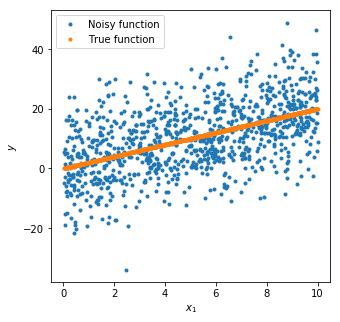

In [5]:
# Showing the true and noisy function
fig = plt.figure(figsize=(5,5))
plt.plot(x1, y_noisy, '.', label='Noisy function')
plt.plot(x1, y, '.', label='True function')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.legend()
plt.show()

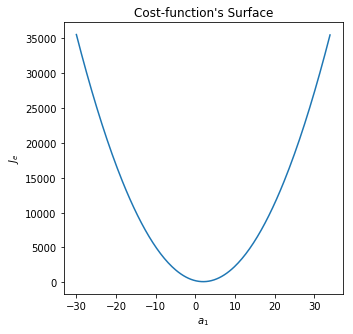

In [6]:
# Generate M values for the coefficient
M = 200
A1 = np.linspace(-30.0, 34.0, M)

# Generate points for plotting the cost-function surface
J = np.zeros((M))

for iter1 in range(0, M):
    yhat = A1[iter1]*x1
    J[iter1] = (1.0/N)*np.sum(np.square(y_noisy-yhat))
    
# Plot cost-function surface (in this case we have one variable (a1))
fig = plt.figure(figsize=(5,5))
plt.plot(A1, J)
plt.xlabel('$a_1$')
plt.ylabel('$J_e$')
plt.title('Cost-function\'s Surface')

# Show the plot
plt.show()

<h3 align="center" style="color:red"> 
    <b>
        Closed-form Solution
    </b>
</h3>

In [7]:
# Closed-form solution
a1_opt = np.linalg.pinv(np.transpose(x1).dot(x1)).dot(np.transpose(x1).dot(y_noisy))

yhat = a1_opt*x1

Joptimum = (1.0/N)*np.sum(np.power((y_noisy-yhat),2))

print(Joptimum)

99.43362282057217


<h3 align="center" style="color:red"> 
    <b>
        Gradient Descent Solution
    </b>
</h3>

In [8]:
# Maximum number of iteration
maxNumIter = 10000

# Learning step
alpha = 0.01

# Create empty structures to save the learning history
a1_hist = np.zeros((maxNumIter))
Jgd = np.zeros(maxNumIter)

# Initial value for the coefficient
a1 = -30

# Save the initial value in the history
a1_hist[0] = a1

# Calculate the initial ŷ (Hypothetical function)
yhat = a1 * x1

# Calculate the initial Mean-squared error
Jgd[0] = (1.0/N)*np.sum(np.power((y_noisy - yhat),2))

# Control variables for the loop statement
error = 1
iteration = 0

# Maximum error allowed between two iterations (Je(i) and Je(i+1))
epslon = 0.0001

while(error > epslon and iteration < maxNumIter-1):
    # Calculate the value of the function for the a1
    h = a1 * x1
    
    # Partial derivative error function in relation to a1 coefficient
    update = -(2.0/N)*x1.T.dot(y_noisy - h)

    # Updating the a1 value using the gradient descent method in order to find the minimum value of the cost-function
    a1 = a1 - alpha * update
    
    # Saving the obtained value for a1 coefficient
    a1_hist[iteration+1] = a1
    
    # Calculate the values of the hypothetical function based on the new a1
    yhat = a1 * x1
    
    # Calculate the Mean-Squared error for this iteration and save in the Jgd history
    Jgd[iteration+1] = (1.0/N)*sum(np.power((y_noisy - yhat),2))
    
    # Calculate the difference between the error from actual to the last iteration
    error = np.abs(Jgd[iteration]-Jgd[iteration+1])
    
    iteration += 1

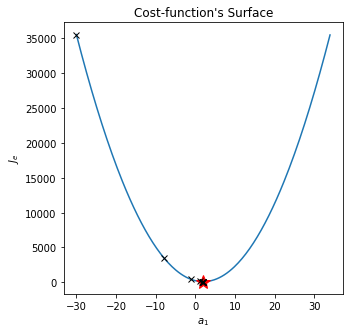

In [9]:
# Plot cost-function surface with the learning history
fig = plt.figure(figsize=(5,5))
plt.plot(A1, J)
plt.xlabel('$a_1$')
plt.ylabel('$J_e$')
plt.title('Cost-function\'s Surface')
plt.plot(a1_opt[0], Joptimum, c='r', marker='*', markersize=14) # Global minimum value
plt.plot(a1_hist[0:iteration], Jgd[0:iteration], 'kx') # Path to the global minimum value

# Show the plot
plt.show()

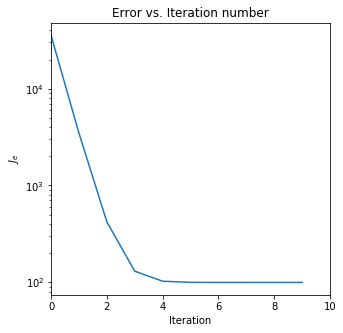

In [10]:
# Plot the learning history (Cost-function x Iteration)
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0,iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')

plt.show()

In [11]:
# a1 obtained with gradient descent method
print(a1[0][0])
# a1 obtained with closed-form solution
print(a1_opt[0][0])

2.01253417436744
2.0127845339946164


<h2 align="center"> 
    <b>
        Example 2: Implementation with y = 2.x1 + 2.x2, that is, two attributes and no bias.
    </b>
</h2>

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib notebook

In [13]:
# Reseting random seed to generate always the same random values
np.random.seed(1234)

In [14]:
# Number of examples
N = 1000

In [15]:
# Input values (features) with 10 of standard deviation and normal distribution 
x1 =  10 * np.random.randn(N, 1)
x2 =  10 * np.random.randn(N, 1)

# True function
y = 2.0*x1 + 2.0*x2

# Noisy function (Observable function)
y_noisy = y + 10.0*np.random.randn(N, 1)

In [16]:
# Generate M equally spaced values for a1 and a2. Range: -30 to 34
M = 200
a1 = np.linspace(-30.0, 34.0, M)
a2 = np.linspace(-30.0, 34.0, M)

# Create a grid with pair values for a1 and a2
A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface
J = np.zeros((M,M))

for iter1 in range(0, M):
    for iter2 in range(0, M):
        # Calculate the hypothetical function
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        # Calculate the cost-function value and save
        J[iter1][iter2] = (1.0/N)*np.sum(np.square(y_noisy-yhat))

<IPython.core.display.Javascript object>


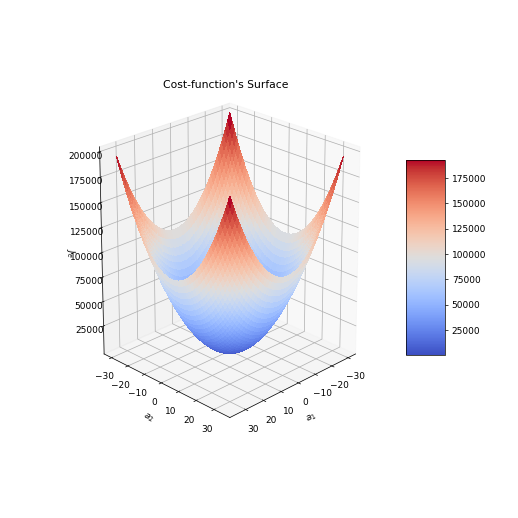

In [33]:
# Plot the Cost-functions's surface
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap = cm.coolwarm, linewidth=0, antialiased=False)

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')

plt.title('Cost-function\'s Surface')

ax.view_init(20,45)

# Show the surface
plt.show()

<h3 align="center" style="color:red"> 
    <b>
        Closed-form Solution
    </b>
</h3>

In [34]:
# Closed-form solution
# Concatenate the two arrays of features 
X = np.c_[x1,x2]

# Solving by closed-form
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

# Calculate the hypothetical function with the coefficients found
yhat = X.dot(a_opt)

# Calculate the Mean-squared error
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat),2))

<h3 align="center" style="color:red"> 
    <b>
        Gradient Descent Solution
    </b>
</h3>

In [35]:
# Defining the maximum number of iterations
maxNumIter = 10000

# Defining the learning rate
alpha = 0.004 # Great value.
#alpha = 0.0001 # Slow convergence
#alpha = 0.008  # Algorithm diverges

# Create empty structures to save the learning history
a_hist = np.zeros((2, maxNumIter))
Jgd = np.zeros(maxNumIter)

# Initialize the coefficient values with a1 and a2 equals to -30
a = np.array([-30.0, -30.0]).reshape(2,1)

# Save the initial value in the history
a_hist[:, 0] = a.reshape(2,)

# Calculate the initial ŷ (Hypothetical function)
yhat = X.dot(a)

# Calculate the initial value of cost-function
Jgd[0] = (1.0/N)*sum(np.power((y_noisy - yhat), 2))

# Control variable for the loop statement
error = 1
iteration = 0

# Maximum error allowed between two iterations (Je(i) and Je(i+1))
epslon = 0.0001

while(error > epslon and iteration < maxNumIter-1):
    # Calculate the ŷ (Hypothetical function)
    h = X.dot(a)
    
    # Partial derivative error function in relation to all coefficients
    update = -(2.0/N)*X.T.dot(y_noisy - h)

    # Update the coefficient values
    a = a - alpha*update
    
    # Save the coefficient in the history
    a_hist[:, iteration+1] = a.reshape(2,)
    
    # Calulate the new ŷ
    yhat = X.dot(a)
    
    # Save the value of the cost-function
    Jgd[iteration+1] = (1.0/N)*sum(np.power((y_noisy - yhat), 2))
    
    error = np.abs(Jgd[iteration] - Jgd[iteration+1])
    
    iteration += 1
    

<IPython.core.display.Javascript object>


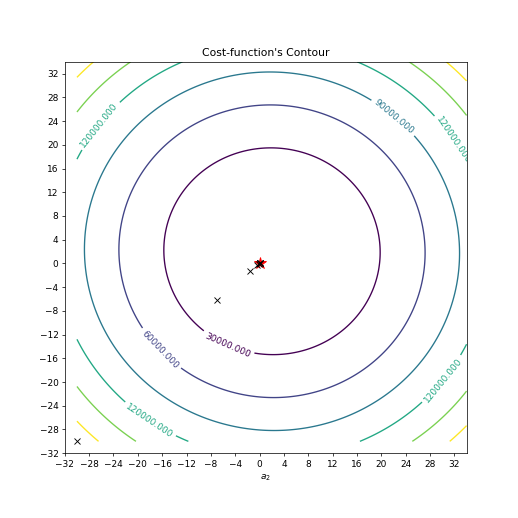

In [36]:
fig = plt.figure(figsize = (8,8))

cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$')
plt.xlabel('$a_2$')

plt.title('Cost-function\'s Contour')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')

plt.xticks(np.arange(-32, 34, step=4.0))
plt.yticks(np.arange(-32, 34, step=4.0))
plt.show()

In [37]:
# Gradient Descent final solution
print(a)

[[0.01314132]
 [0.01679802]]


<IPython.core.display.Javascript object>


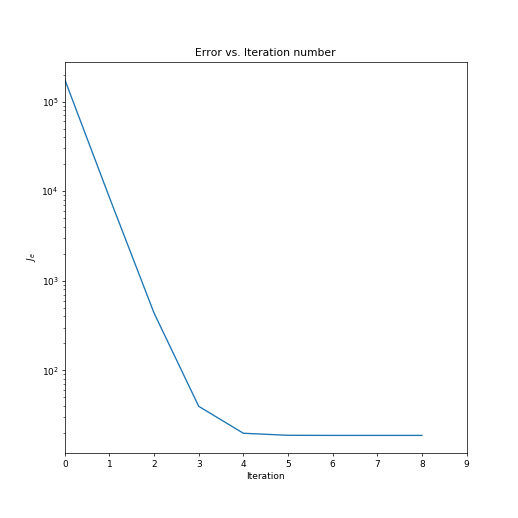

In [38]:
# Plot the learning history (Cost-function x Iteration)
fig = plt.figure(figsize=(8,8))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0,iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')

plt.show()

<h2 align="center"> 
    <b>
        Example 3: Implementation with y = 2 + 2.x1, that is, one single attribute and bias.
    </b>
</h2>

In [39]:
# Importing all necessary libraries.
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.core.display import display, HTML

%matplotlib notebook

In [40]:
# Reseting random seed to generate always the same random values
np.random.seed(1234)

<h3 align="center"> 
    <b>
        Creating functions
    </b>
</h3>

In [41]:
def calculateErrorSurface(X, y):
    """Generate data points for plotting the error surface."""
    # Number of examples.
    N = len(y)
    # Generate values for parameter space.
    M = 200
    a0 = np.linspace(-10.0, 14.0, M)
    a1 = np.linspace(-10.0, 14.0, M)

    A0, A1 = np.meshgrid(a0, a1)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            yhat = A0[iter1, iter2] + A1[iter1, iter2]*X
            J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat))
            
    return J, A0, A1
            
def calculateClosedFormSolution(X, y):
    """Calculate closed-form solution using the normal equation."""
    # Number of examples.
    N = len(y)
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = X.dot(a_opt)
    Joptimum = (1.0/N)*np.sum(np.power((y - yhat), 2))
    
    return Joptimum, a_opt

def h(X, a):
    """Hypothesis Function"""    
    return X.dot(a)

def batchGradientDescent(X, y, alpha, n_iterations):
    """Batch gradient descent solution."""
    
    # Number of examples.
    N = len(y)
    
    # Initialize error history with zeros.
    Jgd = np.zeros(n_iterations+1)
    
    # Random initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)
    
    # Prediction with initial 'a'.
    yhat = X.dot(a)
    # Calculate the error for initial 'a' value.
    Jgd[0] = (1.0/N)*np.sum(np.power(y - yhat, 2))

    # Batch gradient-descent loop.
    error = 1
    iteration = 0
    while(error > 1e-30 and iteration < n_iterations):
        
        # Calculate the gradient vector.
        h = X.dot(a)
        gradients = -(2.0/N)*X.T.dot(y - h)
        
        # Update the weights.
        a = a - alpha * gradients
        
        # Keep current value in the history vector.
        a_hist[:, iteration+1] = a.reshape(2,)
        
        # Calculate and keep the error for the updated 'a' value.
        yhat = X.dot(a)
        Jgd[iteration+1] = (1.0/N)*sum(np.power((y - yhat), 2))
        
        # Calculate the error between two subsequent iterations.
        error = np.abs(Jgd[iteration]-Jgd[iteration+1])
        
        # Increment the iteration number.
        iteration += 1
        
    return a, a_hist, Jgd, iteration

In [42]:
# Number of examples.
N = 1000

# Feature.
x = 2.0 * np.random.rand(N, 1)

# Noise.
w = np.random.randn(N, 1)

# True function/model.
y = 2.0 + 2.0*x

# Observable function.
y_noisy = y + w

<IPython.core.display.Javascript object>


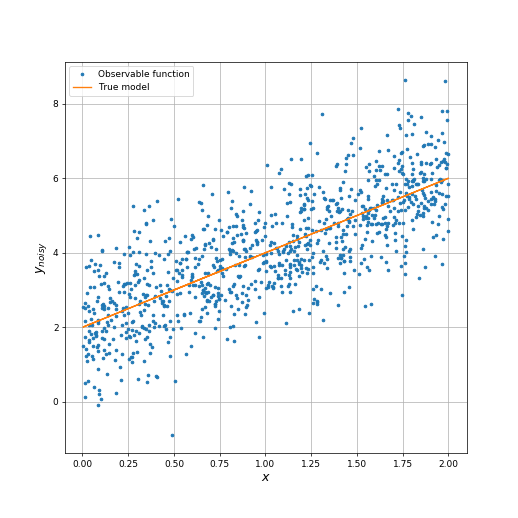

In [43]:
# Plot cost-function surface.
fig = plt.figure(figsize=(8,8))
plt.plot(x, y_noisy, '.', label='Observable function')
plt.plot(x, y, label='True model')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y_{noisy}$', fontsize=14)
plt.legend()
plt.grid()

#Show the plot.
plt.show()

<IPython.core.display.Javascript object>


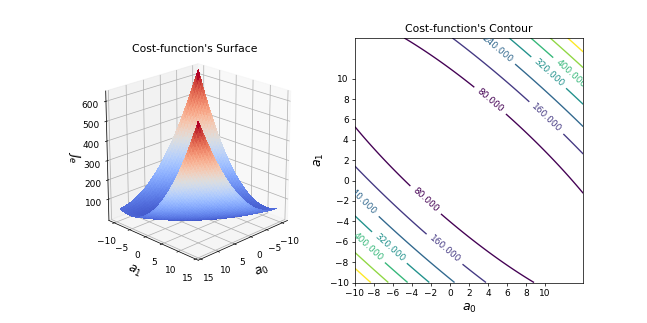

In [44]:
# Calculate data point for plotting error surface.
J, A0, A1 = calculateErrorSurface(x, y_noisy)

# Plot cost-function surface.
fig = plt.figure(figsize=(10, 5))

# Set up the axes for the first plot.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
ax.set_title('Cost-function\'s Surface')
ax.view_init(20, 45)

# Set up the axes for the second plot.
ax = fig.add_subplot(1, 2, 2)
cp = plt.contour(A0, A1, J)
ax.clabel(cp, inline=1, fontsize=10)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_title('Cost-function\'s Contour')
ax.set_xticks(np.arange(-10, 12, step=2.0))
ax.set_yticks(np.arange(-10, 12, step=2.0))

# Show the plot.
plt.show()

In [28]:
# Attribute matrix.
# add x0 = 1 to each instance.
X_b = np.c_[np.ones((N, 1)), x]

<h3 align="center" style="color:red"> 
    <b>
        Closed-form Solution
    </b>
</h3>

In [45]:
# Calculate closed-form solution.
Joptimum, a_opt = calculateClosedFormSolution(X_b, y_noisy)

# Print best solution.
print('a0: %1.4f' % (a_opt[0][0]))
print('a1: %1.4f' % (a_opt[1][0]))
print('Erro ótimo:', Joptimum)

a0: 2.0331
a1: 1.9820
Erro ótimo: 0.994060499872569


<h3 align="center" style="color:red"> 
    <b>
        Gradient Discent Solution
    </b>
</h3>

In [46]:
# Batch gradient descent solution.
alpha = 0.1  # learning rate

# Number of iterations.
n_iterations = 1000

# Run batch gradient-descent algorithm.
a, a_hist, Jgd, iteration = batchGradientDescent(X_b, y_noisy, alpha, n_iterations)

# Print solution found with the gradient-descent algorithm.
print('a0: %1.4f' % (a[0][0]))
print('a1: %1.4f' % (a[1][0]))
print('Erro GD:', Jgd[iteration])

a0: 2.0331
a1: 1.9820
Erro GD: 0.994060499872571


<h3 align="center" style="color:red"> 
    <b>
        Showing the learning process based on iteration and Mean-squared error history
    </b>
</h3>

<IPython.core.display.Javascript object>


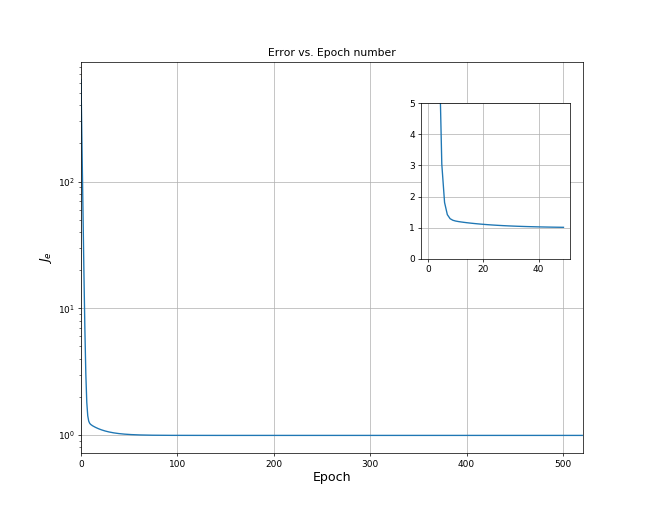

In [47]:
fig = plt.figure(figsize=(10,8))

plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Epoch number')
plt.grid()

left, bottom, width, height = [0.65, 0.5, 0.23, 0.3]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(np.arange(0, 50), Jgd[0:50])
ax3.grid()
ax3.set_ylim(0, 5)
plt.show()

<b> Observações: </b>
 * O erro converge para o menor valor possível sem variações de valor entre épocas.
 * Convergência pode ser bem lenta se o conjunto for muito grande, dado que o modelo é apresentado a todos os exemplos a cada época.



<h3 align="center" style="color:red"> 
    <b>
        Contour's surface plot with history values
    </b>
</h3>

<IPython.core.display.Javascript object>


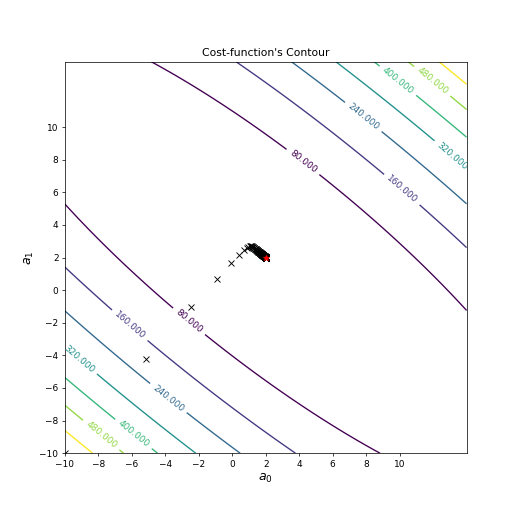

In [48]:
# Plot figure.        
fig = plt.figure(figsize=(8,8))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
# save figure into file.
#plt.savefig("error_contour_bgd.png", dpi=600)
plt.show()

<b> Observações:</b>
* Os pesos seguem sempre o sentido do máximo decrescimento da superfície de erro.
* A caminho feito pelas atualizações dos pesos é regular, sem variações bruscas de direção a cada época.
* Converge e se estabiliza no ponto de mínimo global, ou seja, o vetor gradiente é praticamente nulo.
* Ao final do treinamento, os valores dos pesos são muito próximos dos valores ótimos.



<h3 align="center" style="color:red"> 
    <b>
        Comparing the results between closed-form and gradient descent solution
    </b>
</h3>

In [49]:
print('Optimum result')
print('a0_opt: ' + str(a_opt[0][0]))
print('a1_opt: ' + str(a_opt[1][0]))

print('\nApproximated result')
print('a0_gd: ' + str(a[0][0]))
print('a1_gd: ' + str(a[1][0]))

Optimum result
a0_opt: 2.0331312783699307
a1_opt: 1.982012595514705

Approximated result
a0_gd: 2.0331311947363586
a1_gd: 1.9820126648808924


<h3 align="center" style="color:red"> 
    <b>
        Animated video showing the steps of the solution for this case
    </b>
</h3>

<IPython.core.display.Javascript object>


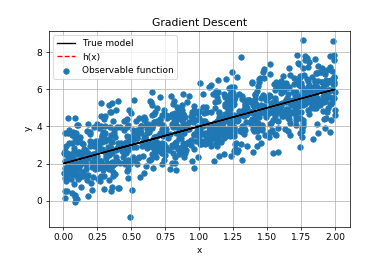

In [53]:
fig, ax = plt.subplots()
plt.scatter(x, y_noisy, label='Observable function')
plt.plot(x, y, 'k', label='True model')
xl = []
yl = []
ln, = plt.plot(xl, yl, 'r--', animated=True, label='h(x)')
plt.grid()
plt.title('Gradient Descent')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend()
    return ln,

def update(frame):
    theta = np.zeros((2,1))
    theta[0] = a_hist[0,frame]
    theta[1] = a_hist[1,frame]
    f = functools.partial(h, a=theta)
    y = f(X_b)
    ln.set_data(x, y)
    return ln,

# Create animated figure.
ani = FuncAnimation(fig, update, frames=200, init_func=init, blit=False, interval=300)
# Display the animated figure.
display(HTML(ani.to_html5_video()))

# Save the animated figure.
ani.save('../img/animated_linear_regression.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

<h3 align="center" style="color:red"> 
    <b>
        Animated video showing the steps of the solution based on coefficient values
    </b>
</h3>

<IPython.core.display.Javascript object>


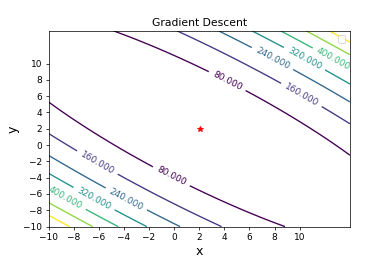

In [54]:
fig, ax = plt.subplots()
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
xl = []
yl = []
ln, = plt.plot(xl, yl, 'kx', animated=True)
plt.title('Gradient Descent')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))

def init():
    ax.set_xlabel('$a_0$', fontsize=14)
    ax.set_ylabel('$a_1$', fontsize=14)
    return ln,

def update(frame):
    ln.set_data(a_hist[0, frame], a_hist[1, frame])
    return ln,

ani2 = FuncAnimation(fig, update, frames=200, init_func=init, blit=False, interval=1000)
display(HTML(ani2.to_html5_video()))

ani2.save('../img/animated_linear_regression_contour.mp4', fps=30, extra_args=['-vcodec', 'libx264'])